## Waveguide

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import meep as mp
import gplugins.modes as gm

2026-02-03 12:42:52.188 | INFO     | gplugins.gmeep:<module>:39 - Meep '1.30.0' installed at ['/home/hamish/miniconda3/envs/photonics/lib/python3.11/site-packages/meep']


In [2]:
core_w = 0.45
core_t = 0.40
wl = 0.810

modes = gm.find_modes_waveguide(
    parity=mp.NO_PARITY,
    wavelength=wl,
    core_width=core_w,
    core_thickness=core_t,
    core_material=2.0176,  # SiN ANT
    clad_material=1.4759,  #SiO2 ANT
    resolution=100,
    sy=5,
    sz=5,
    nmodes=4,
)
m1 = modes[1]
m2 = modes[2]
m3 = modes[3]
m4 = modes[4]

/home/hamish/miniconda3/envs/photonics/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


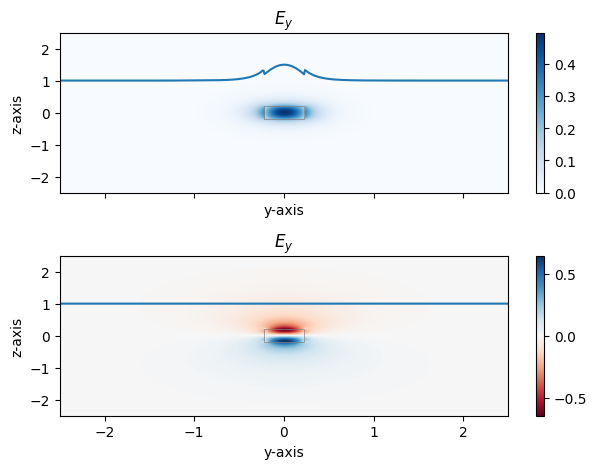

In [3]:
wg1 = patches.Rectangle(
    (-core_w / 2, -core_t / 2),
    core_w,
    core_t,
    linewidth=0.5,
    edgecolor="gray",
    facecolor="none",
)
wg4 = patches.Rectangle(
    (-core_w / 2, -core_t / 2),
    core_w,
    core_t,
    linewidth=0.5,
    edgecolor="gray",
    facecolor="none",
)

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
islice = int(len(m1.y)/2)

plt.axes(ax1)
m1.plot_ey(cmap='Blues', show = False) # this line can also be run alone to plot ey
ax1.add_patch(wg1)
plt.plot(m1.y, m1.E[:, islice, 0, 1] + 1.0)

plt.axes(ax2)
m4.plot_ey(show = False) 
ax2.add_patch(wg4)
plt.plot(m4.y, m4.E[:, islice, 0, 1] + 1.0)

plt.tight_layout()
plt.show()

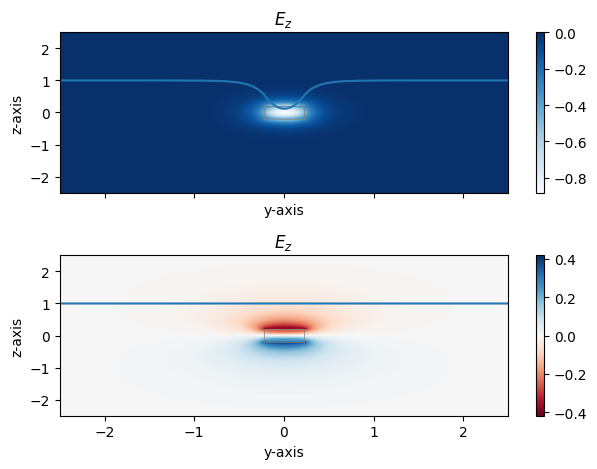

In [4]:
wg2 = patches.Rectangle(
    (-core_w / 2, -core_t / 2),
    core_w,
    core_t,
    linewidth=0.5,
    edgecolor="gray",
    facecolor="none",
)
wg3 = patches.Rectangle(
    (-core_w / 2, -core_t / 2),
    core_w,
    core_t,
    linewidth=0.5,
    edgecolor="gray",
    facecolor="none",
)

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
islice = int(len(m1.y)/2)

plt.axes(ax1)
m2.plot_ez(cmap='Blues', show = False) # this line can also be run alone to plot ey
ax1.add_patch(wg2)
plt.plot(m2.z, m2.E[:, islice, 0, 2] + 1.0)

plt.axes(ax2)
m3.plot_ez(show = False) 
ax2.add_patch(wg3)
plt.plot(m3.z, m3.E[:, islice, 0, 2] + 1.0)

plt.tight_layout()
plt.show()

In [ ]:
mm = gm.find_mode_dispersion(
    core="Si",
    clad="SiO2",
    mode_number=1,
    core_width=core_w,
    core_thickness=core_t,
    resolution=100,
    sy=3,
    sz=3,
    
    )


neff = m1.neff
ng = mm.ng


print(f'The effective index of mode 1 is : {neff:.3f}')
print(f'The group index of mode 1 is : {ng:.3f}')